    is_cluster  pocket_name                pocket_alias   ward_id  \
0       4 in 1       4 in 1  Wallacedene 14 / J Section  19100006   
1  Acacia Road  Acacia Road      Acacia Park - Parktown  19100066   
2    Amy Biehl    Amy Biehl                 School Site  19100034   
3  Appel Boord  Appel Boord                         NaN  19100022   
4       Area K       Area K                 Never Never  19100088   

           ward_councillor  avg_hhsize  area_ha  density_dwellings  \
0      Simpiwe Nonkeyizana        3.72    2.952          50.813008   
1          Melanie Arendse        4.51    0.070         114.285714   
2         Fikiswa Nkunzana        2.89    1.711         301.578025   
3          Johanna Martlow        4.14    0.088         159.090909   
4  Patrick (Pat) Pietersen        4.17    2.661         249.154453   

   structure_count      age_of_is  ... toilets_full_flush  toilets_chemical  \
0              150  15 - 20 years  ...               32.0               0.0   
1     

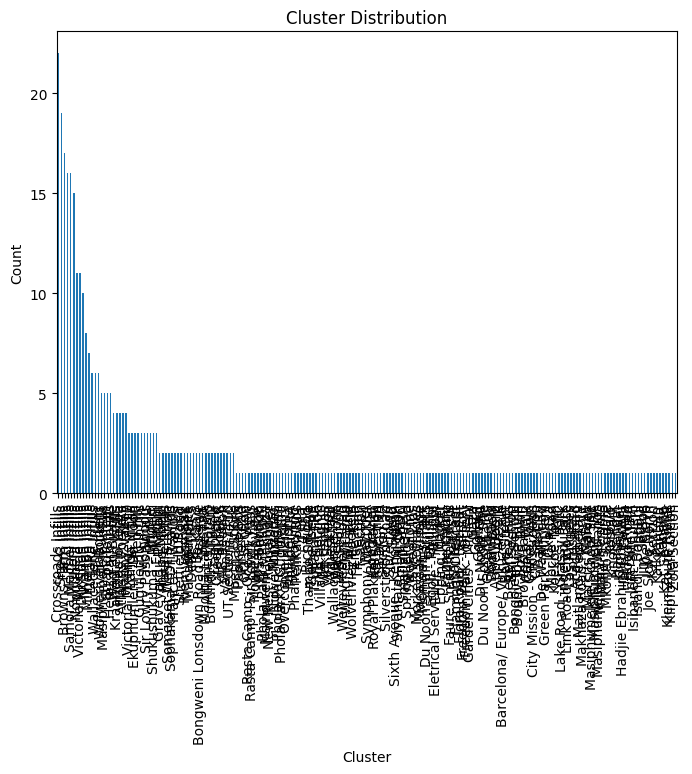

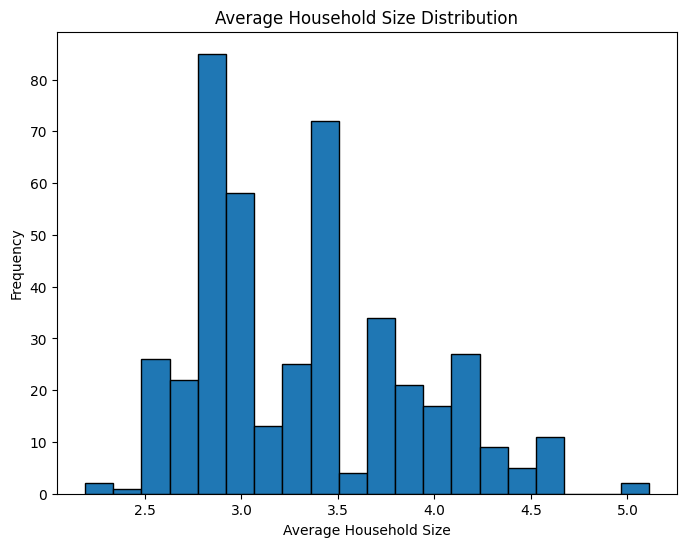

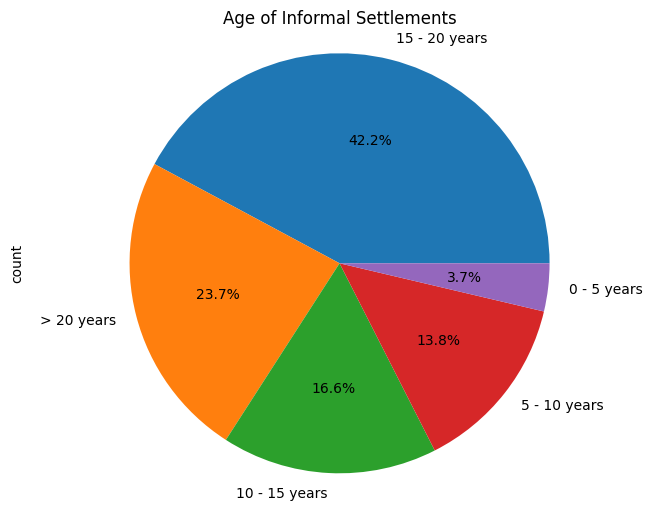

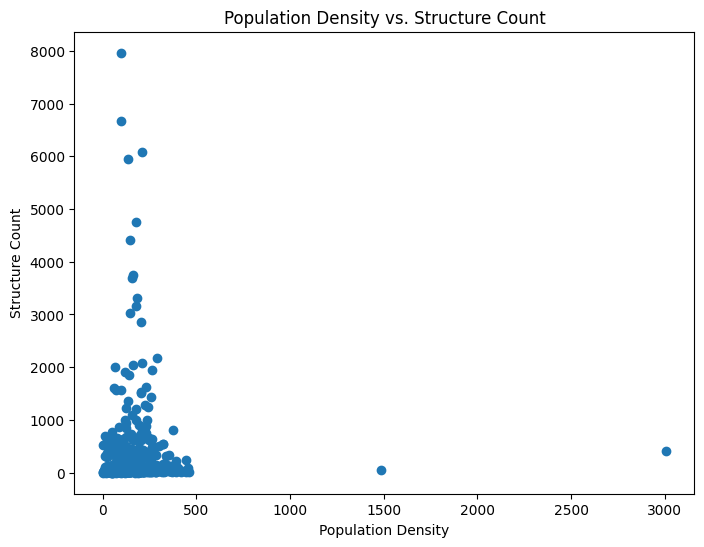

<Figure size 1000x600 with 0 Axes>

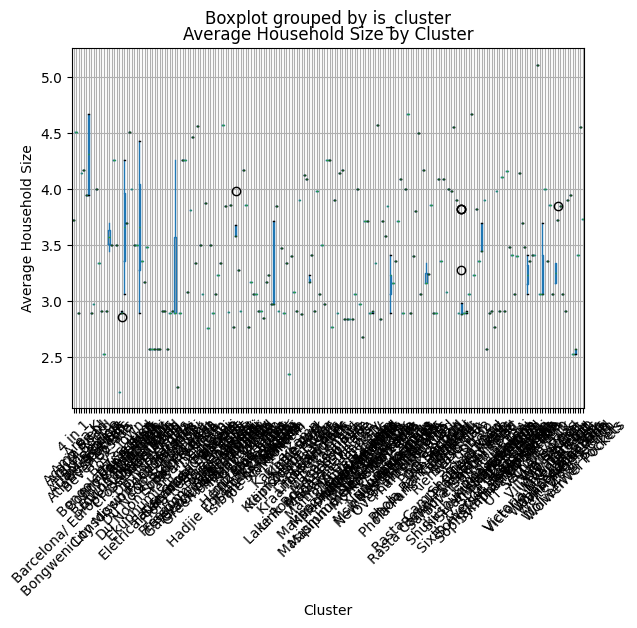

In [6]:
# SR2,3 + 4.2

import pandas as pd
import numpy as np

# Load the dataset
url = "C:/Users/Gumede/Downloads/bky6-3za5.csv"
df = pd.read_csv(url)

print(df.head())

print("Shape of the dataset:", df.shape)
print("\nData types of each column:\n", df.dtypes)
print("\nColumns in the dataset:\n", df.columns)

# Summary statistics
print("\nSummary statistics:\n", df.describe(include='all'))

# Specific column
print("\nUnique values in 'Ward Councillor' column:\n", df['ward_councillor'].unique())

# Checking for missing data
missing_data = df.isnull().sum()
print("\nMissing data in each column:\n", missing_data)

missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
print("\nPercentage of missing data in each column:\n", missing_percentage)

from sklearn.preprocessing import StandardScaler

# Converting ratio strings to numeric values
def convert_ratio_to_numeric(ratio_value):
    if pd.isna(ratio_value):
        return None
    if isinstance(ratio_value, str):
        try:
            numerator, denominator = map(int, ratio_value.split(':'))
            if denominator == 0:
                return None
            return numerator / denominator
        except (ValueError, TypeError):
            return None
    elif isinstance(ratio_value, float):
        return ratio_value
    else:
        return None

# Converting the 'ratio_toilets_dwellings' column to numeric
df['ratio_toilets_dwellings'] = df['ratio_toilets_dwellings'].apply(convert_ratio_to_numeric)

# Filling missing data with median for numerical columns
df['ratio_toilets_dwellings'] = df['ratio_toilets_dwellings'].fillna(df['ratio_toilets_dwellings'].median())

# Drop rows with missing values in critical columns
df = df.dropna(subset=['pocket_name'])

# Check if 'pocket_alias' exists before attempting to drop it
if 'pocket_alias' in df.columns:
    df = df.drop(columns=['pocket_alias'])

# Standardize the 'ratio_toilets_dwellings' column
scaler = StandardScaler()
df['ratio_toilets_dwellings'] = scaler.fit_transform(df[['ratio_toilets_dwellings']])

# Cleaned dataset
print("\nCleaned dataset:\n", df.head())

# Missing data information after cleaning
missing_data = df.isnull().sum()
print("\nMissing data in each column after cleaning:\n", missing_data)
missing_data_percentage = (missing_data / df.shape[0]) * 100
print("\nPercentage of missing data in each column after cleaning:\n", missing_data_percentage)


#SR3
import matplotlib.pyplot as plt

# Summary statistics
summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)

#  Bar plot
plt.figure(figsize=(8, 6))
df['is_cluster'].value_counts().plot(kind='bar')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

#  Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['avg_hhsize'], bins=20, edgecolor='black')
plt.title('Average Household Size Distribution')
plt.xlabel('Average Household Size')
plt.ylabel('Frequency')
plt.show()

#  Pie Chart
plt.figure(figsize=(8, 6))
df['age_of_is'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Age of Informal Settlements')
plt.axis('equal')
plt.show()

#  Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['density_dwellings'], df['structure_count'])
plt.title('Population Density vs. Structure Count')
plt.xlabel('Population Density')
plt.ylabel('Structure Count')
plt.show()

#  Box plot
plt.figure(figsize=(10, 6))
df.boxplot(column='avg_hhsize', by='is_cluster')
plt.title('Average Household Size by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Household Size')
plt.xticks(rotation=45)
plt.show()


In [5]:
import pandas as pd

url = "C:/Users/Gumede/Downloads/bky6-3za5.csv"
df = pd.read_csv(url)

# Linear Search
def linear_search(dataset, target):
    for index, value in enumerate(dataset):
        if value == target:
            return index
    return -1

# Binary Search
def binary_search(dataset, target):
    low = 0
    high = len(dataset) - 1
    while low <= high:
        mid = (low + high) // 2
        if dataset[mid] == target:
            return mid
        elif dataset[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

sorted_councillors = sorted(df['ward_councillor'])

# Searching "Simpiwe Nonkeyizana" using both algorithms
target_councillor = "Simpiwe Nonkeyizana"
linear_result = linear_search(df['ward_councillor'], target_councillor)
binary_result = binary_search(sorted_councillors, target_councillor)

print("Linear Search Result:", linear_result)
print("Binary Search Result:", binary_result)

Linear Search Result: 0
Binary Search Result: 358
